<a href="https://colab.research.google.com/github/Pushpalptha/Project-Adpative-machine-learning-for-covid-19-and-forecasting-/blob/main/PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/country_wise_latest.csv')
data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [ ]:
data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [ ]:
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
data.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [ ]:
data.shape

(187, 15)

In [ ]:
data.ndim

2

In [ ]:
data.index

RangeIndex(start=0, stop=187, step=1)

In [ ]:
data.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [ ]:
a = data.sort_values('Confirmed', ascending = False).head()
for i,j in a[['Country/Region','Confirmed']].values:
    print(f"{i:<12}{j:>12}")

US               4290259
Brazil           2442375
India            1480073
Russia            816680
South Africa      452529


In [ ]:
a = data.sort_values('Recovered / 100 Cases',ascending =False).head(10)
for i in a['Country/Region'].values:
           print(i)

Holy See
Grenada
Dominica
Djibouti
Iceland
Brunei
New Zealand
Qatar
Malaysia
Mauritius


In [ ]:
x = data['WHO Region'].unique()
for i in x:
    mask = data['WHO Region'] == i
    a =data[mask]['Confirmed'].sum()
    print(f"{i:<22}{a:>10}")

Eastern Mediterranean    1490744
Europe                   3299523
Africa                    723207
Americas                 8839286
Western Pacific           292428
South-East Asia          1835297


In [ ]:
a = data.sort_values('Active', ascending=False, ignore_index=True).head(1)
print(a['Country/Region'].values," - ",a['Active'].values)

['US']  -  [2816444]


In [ ]:
def get_country_data(country_name, data):
    country_data = data[data['Country/Region'] == country_name]
    return country_data

country_name = "Australia"
country_data = get_country_data(country_name, data)
print(country_data)


  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
8      Australia      15303     167       9311    5825        368           6   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
8            137                1.09                  60.84   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
8                    1.79                12428           2875   

   1 week % increase       WHO Region  
8              23.13  Western Pacific  


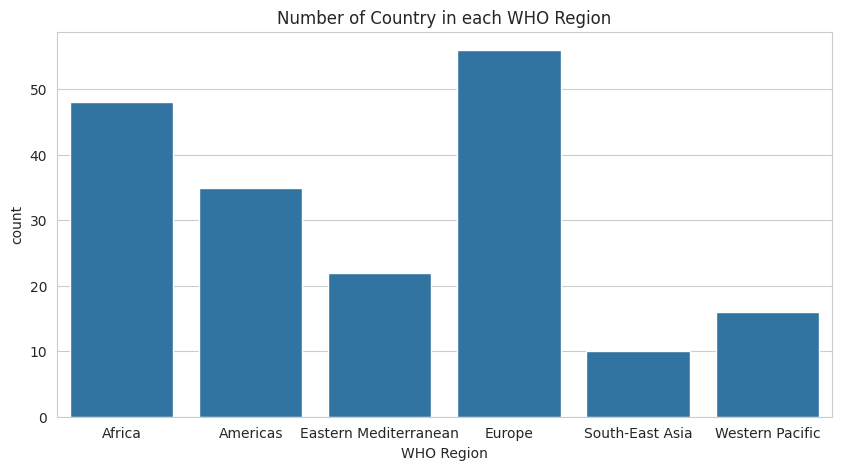

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="WHO Region",data=data,order = data.groupby(by=['WHO Region']).count().index)
plt.title("Number of Country in each WHO Region")
plt.show()

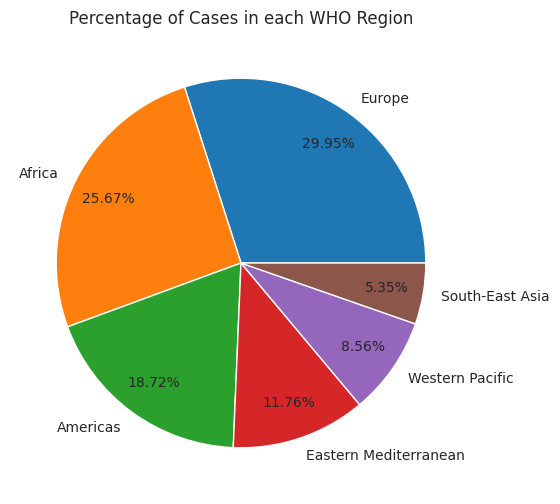

In [ ]:
sns.set_style("whitegrid")
labels = ['Europe', 'Africa', 'Americas','Eastern Mediterranean', 'Western Pacific', 'South-East Asia']
plt.figure(figsize=(8,6))
plt.pie(data['WHO Region'].value_counts(), labels = labels, autopct = '%.2f%%',pctdistance=0.8)
plt.title("Percentage of Cases in each WHO Region")
plt.show()

<Axes: xlabel='WHO Region'>

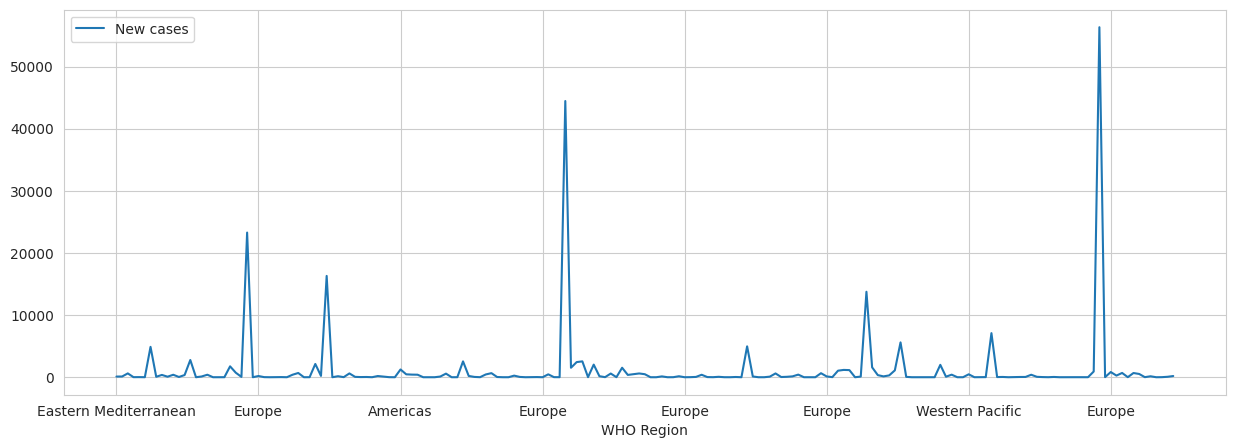

In [ ]:
data.plot(x='WHO Region', y = 'New cases', figsize = (15,5))

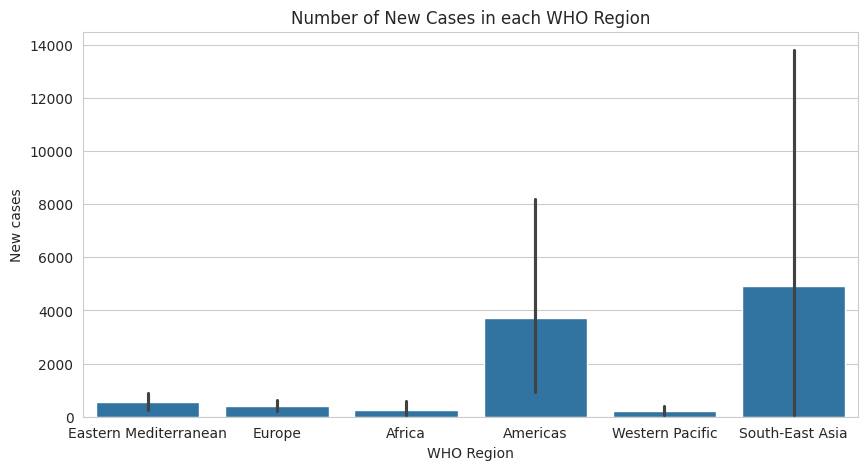

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="WHO Region", y="New cases",data=data)
plt.title("Number of New Cases in each WHO Region")
plt.show()

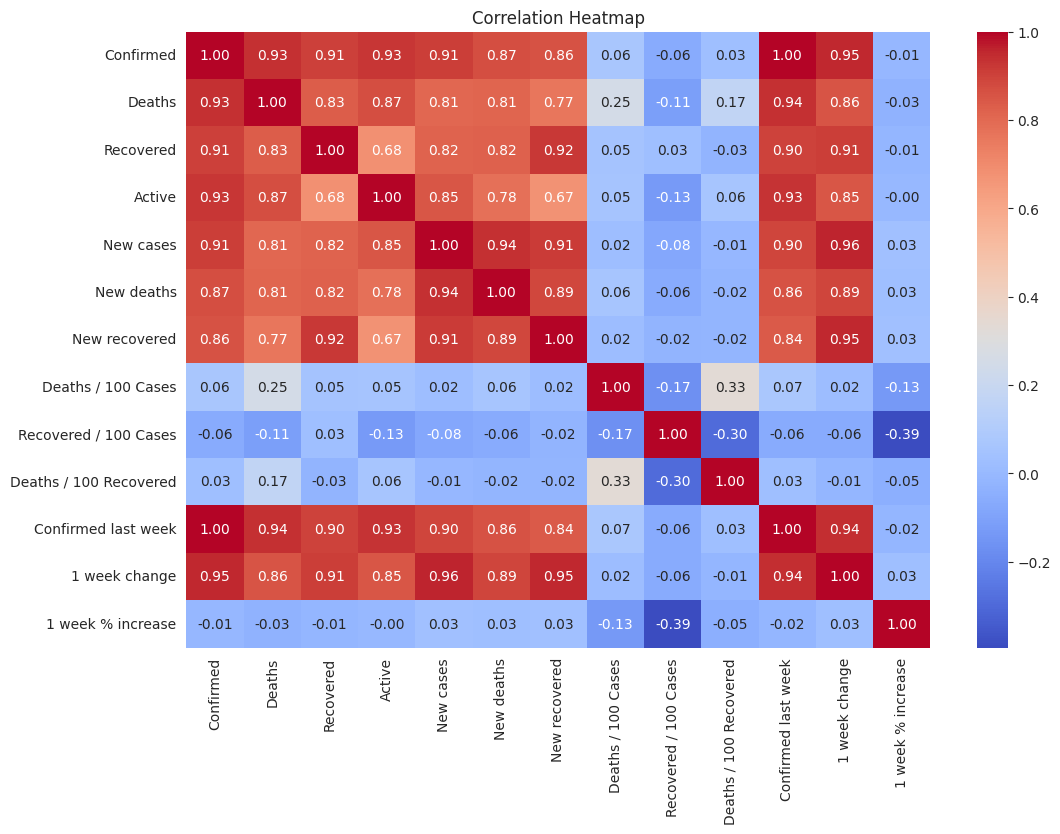

In [ ]:
df = pd.DataFrame(data)

# Drop non-numeric columns
df_numeric = df.drop(columns=["Country/Region", "WHO Region"])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Mean Squared Error: 3133.144795342406


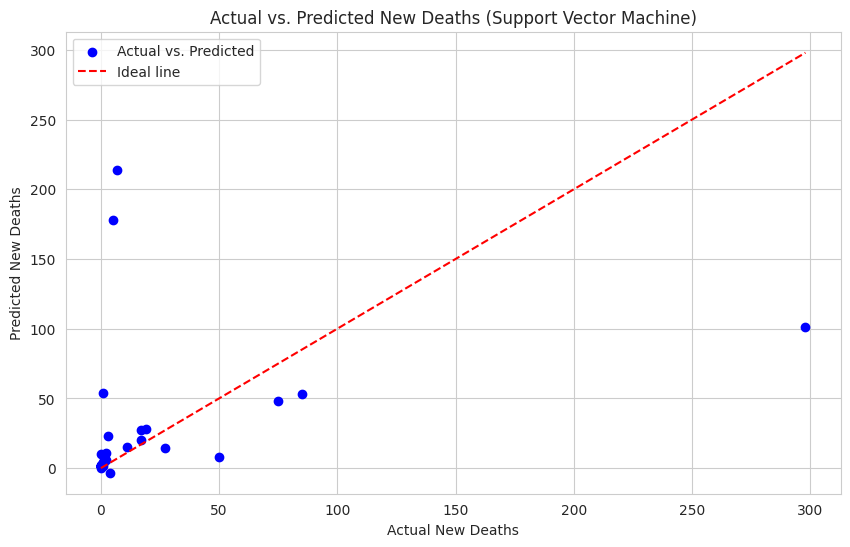

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('/content/country_wise_latest.csv')

# Selecting features and target variable
X = data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases']]
y = data['New deaths']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal line')
plt.xlabel('Actual New Deaths')
plt.ylabel('Predicted New Deaths')
plt.title('Actual vs. Predicted New Deaths (Support Vector Machine)')
plt.legend()
plt.show()


Mean Squared Error: 150427434.01877847


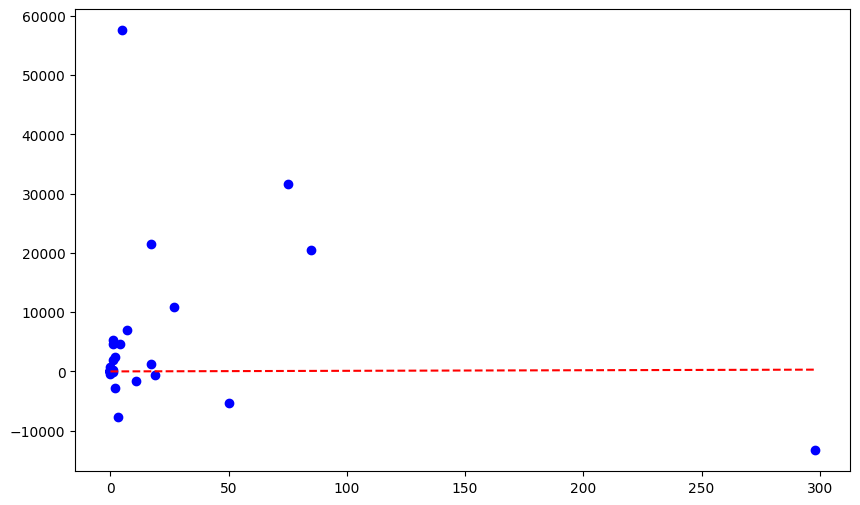

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('/content/country_wise_latest.csv')

# Selecting features and target variable
X = data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases']]
y = data['New deaths']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the SVM model
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal line')
